In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
url = 'https://drive.google.com/uc?id=1Zmjdee6l7A8ZxwLlDzy-IcVf_WfCqwsZ'

data = pd.read_csv(url)
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [115]:
#Checking for duplicates
data.drop_duplicates(inplace=True)

In [116]:
data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


 In X, y, and z, we observe that the minimum value is zero, which is unusual.

In [117]:
data['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [118]:
#droping the 'Id' feature cause it is not helpful in our predection
data.drop(['Id'],inplace=True,axis=1)

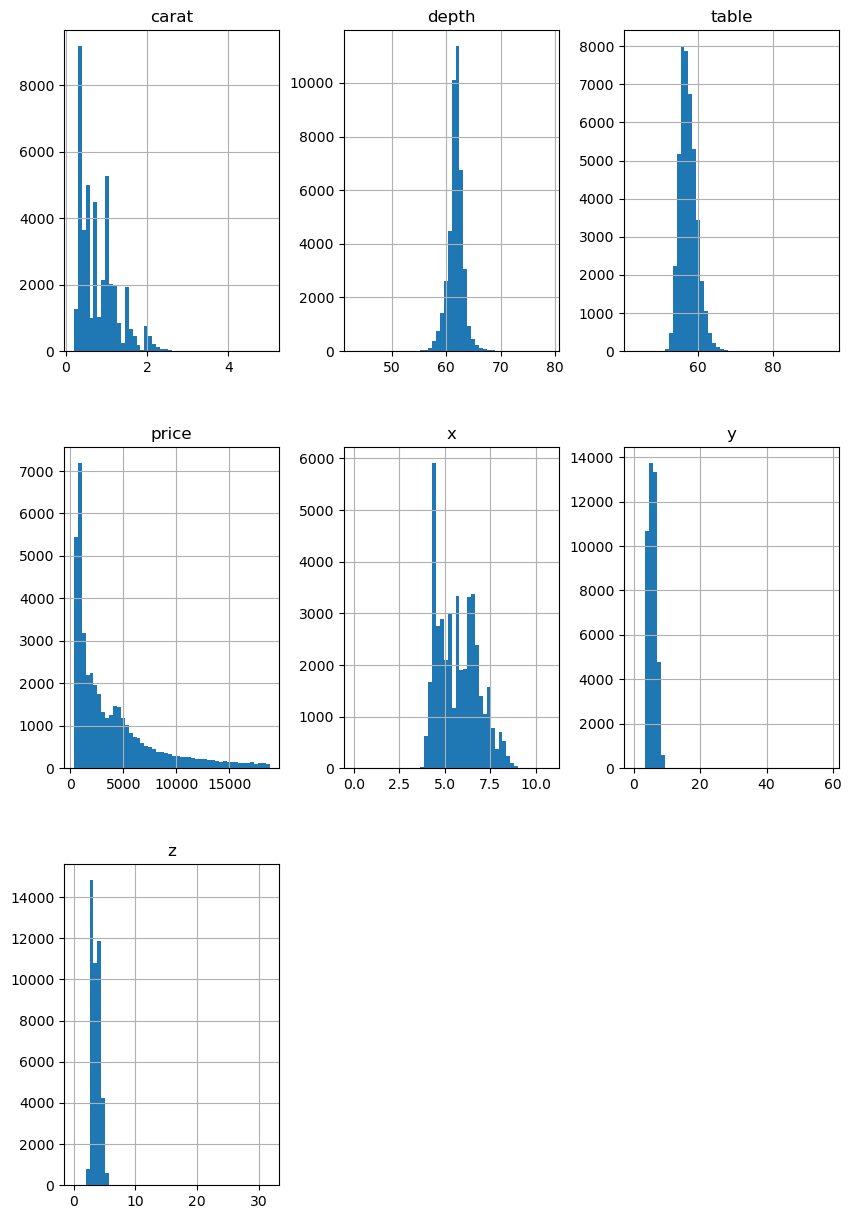

In [119]:
#Discove feature distribution
data.hist(bins=50,figsize=(10,15));

In [120]:
# data correlation 
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


We see that every feature has a strong correlation with the price except for the table and the depth, we have the freedom to drop them but it is preferable not to.

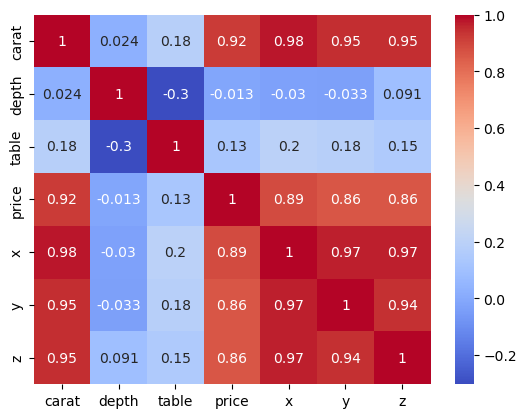

In [121]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True);

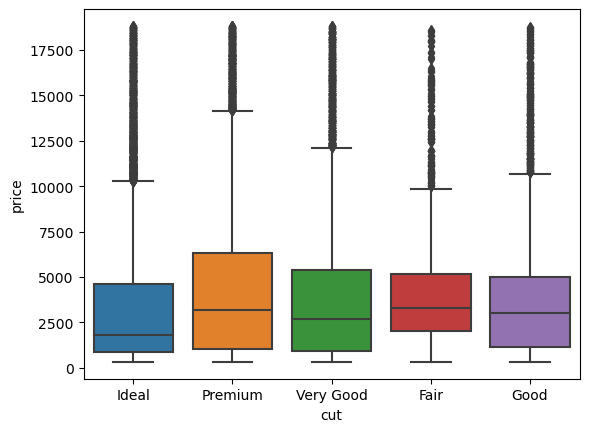

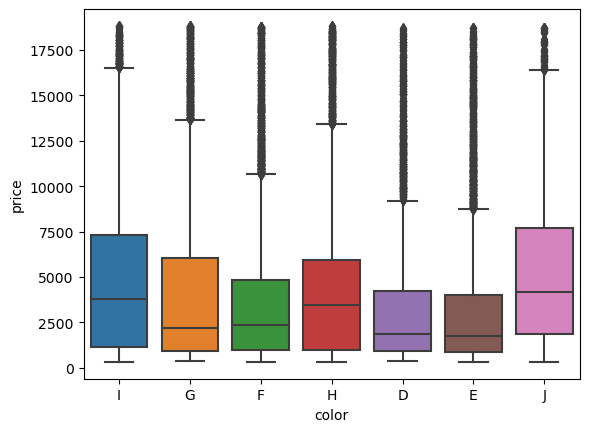

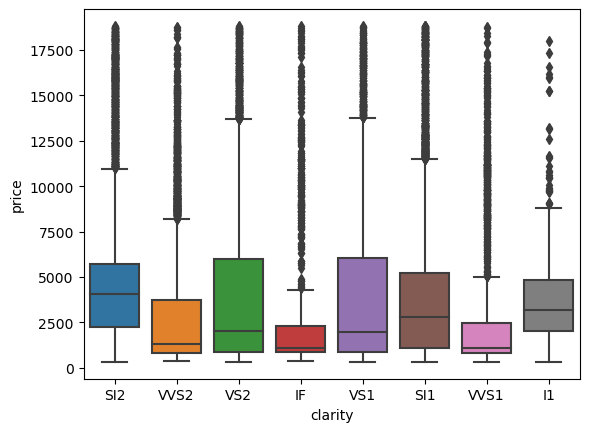

In [122]:
sns.boxplot(x="cut", y="price", data=data)
plt.show()
sns.boxplot(x="color", y="price", data=data)
plt.show()
sns.boxplot(x="clarity", y="price", data=data)
plt.show()

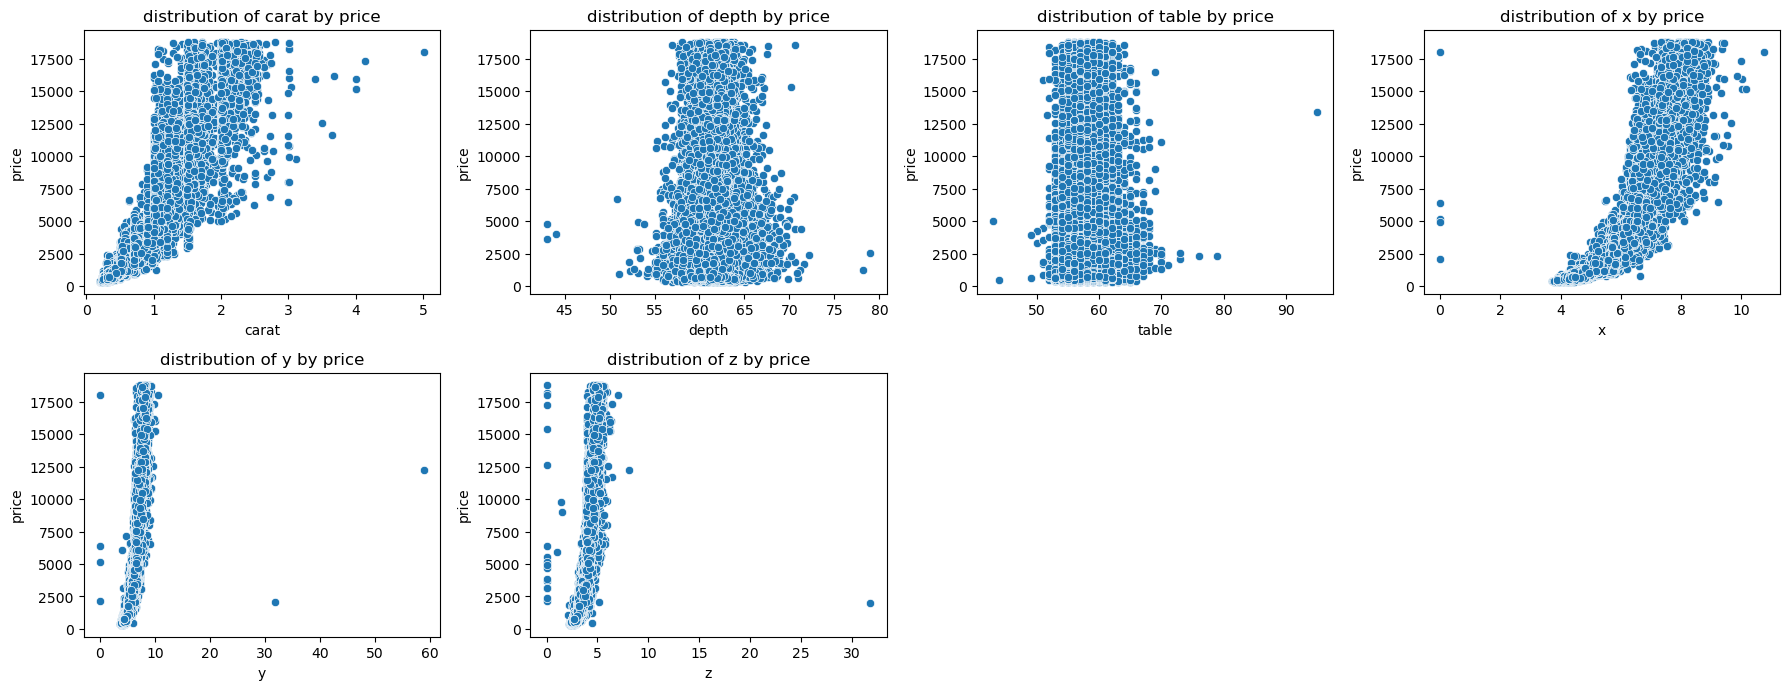

In [123]:
#pairplot of numerical columns vs. price feature
plt.figure(figsize=(18,10))
for e,i in enumerate(data.select_dtypes('float').columns):
    plt.subplot(3,4,e+1)
    sns.scatterplot(x=data[i],y=data.price)
    plt.title(f'distribution of {i} by price')
    plt.tight_layout()

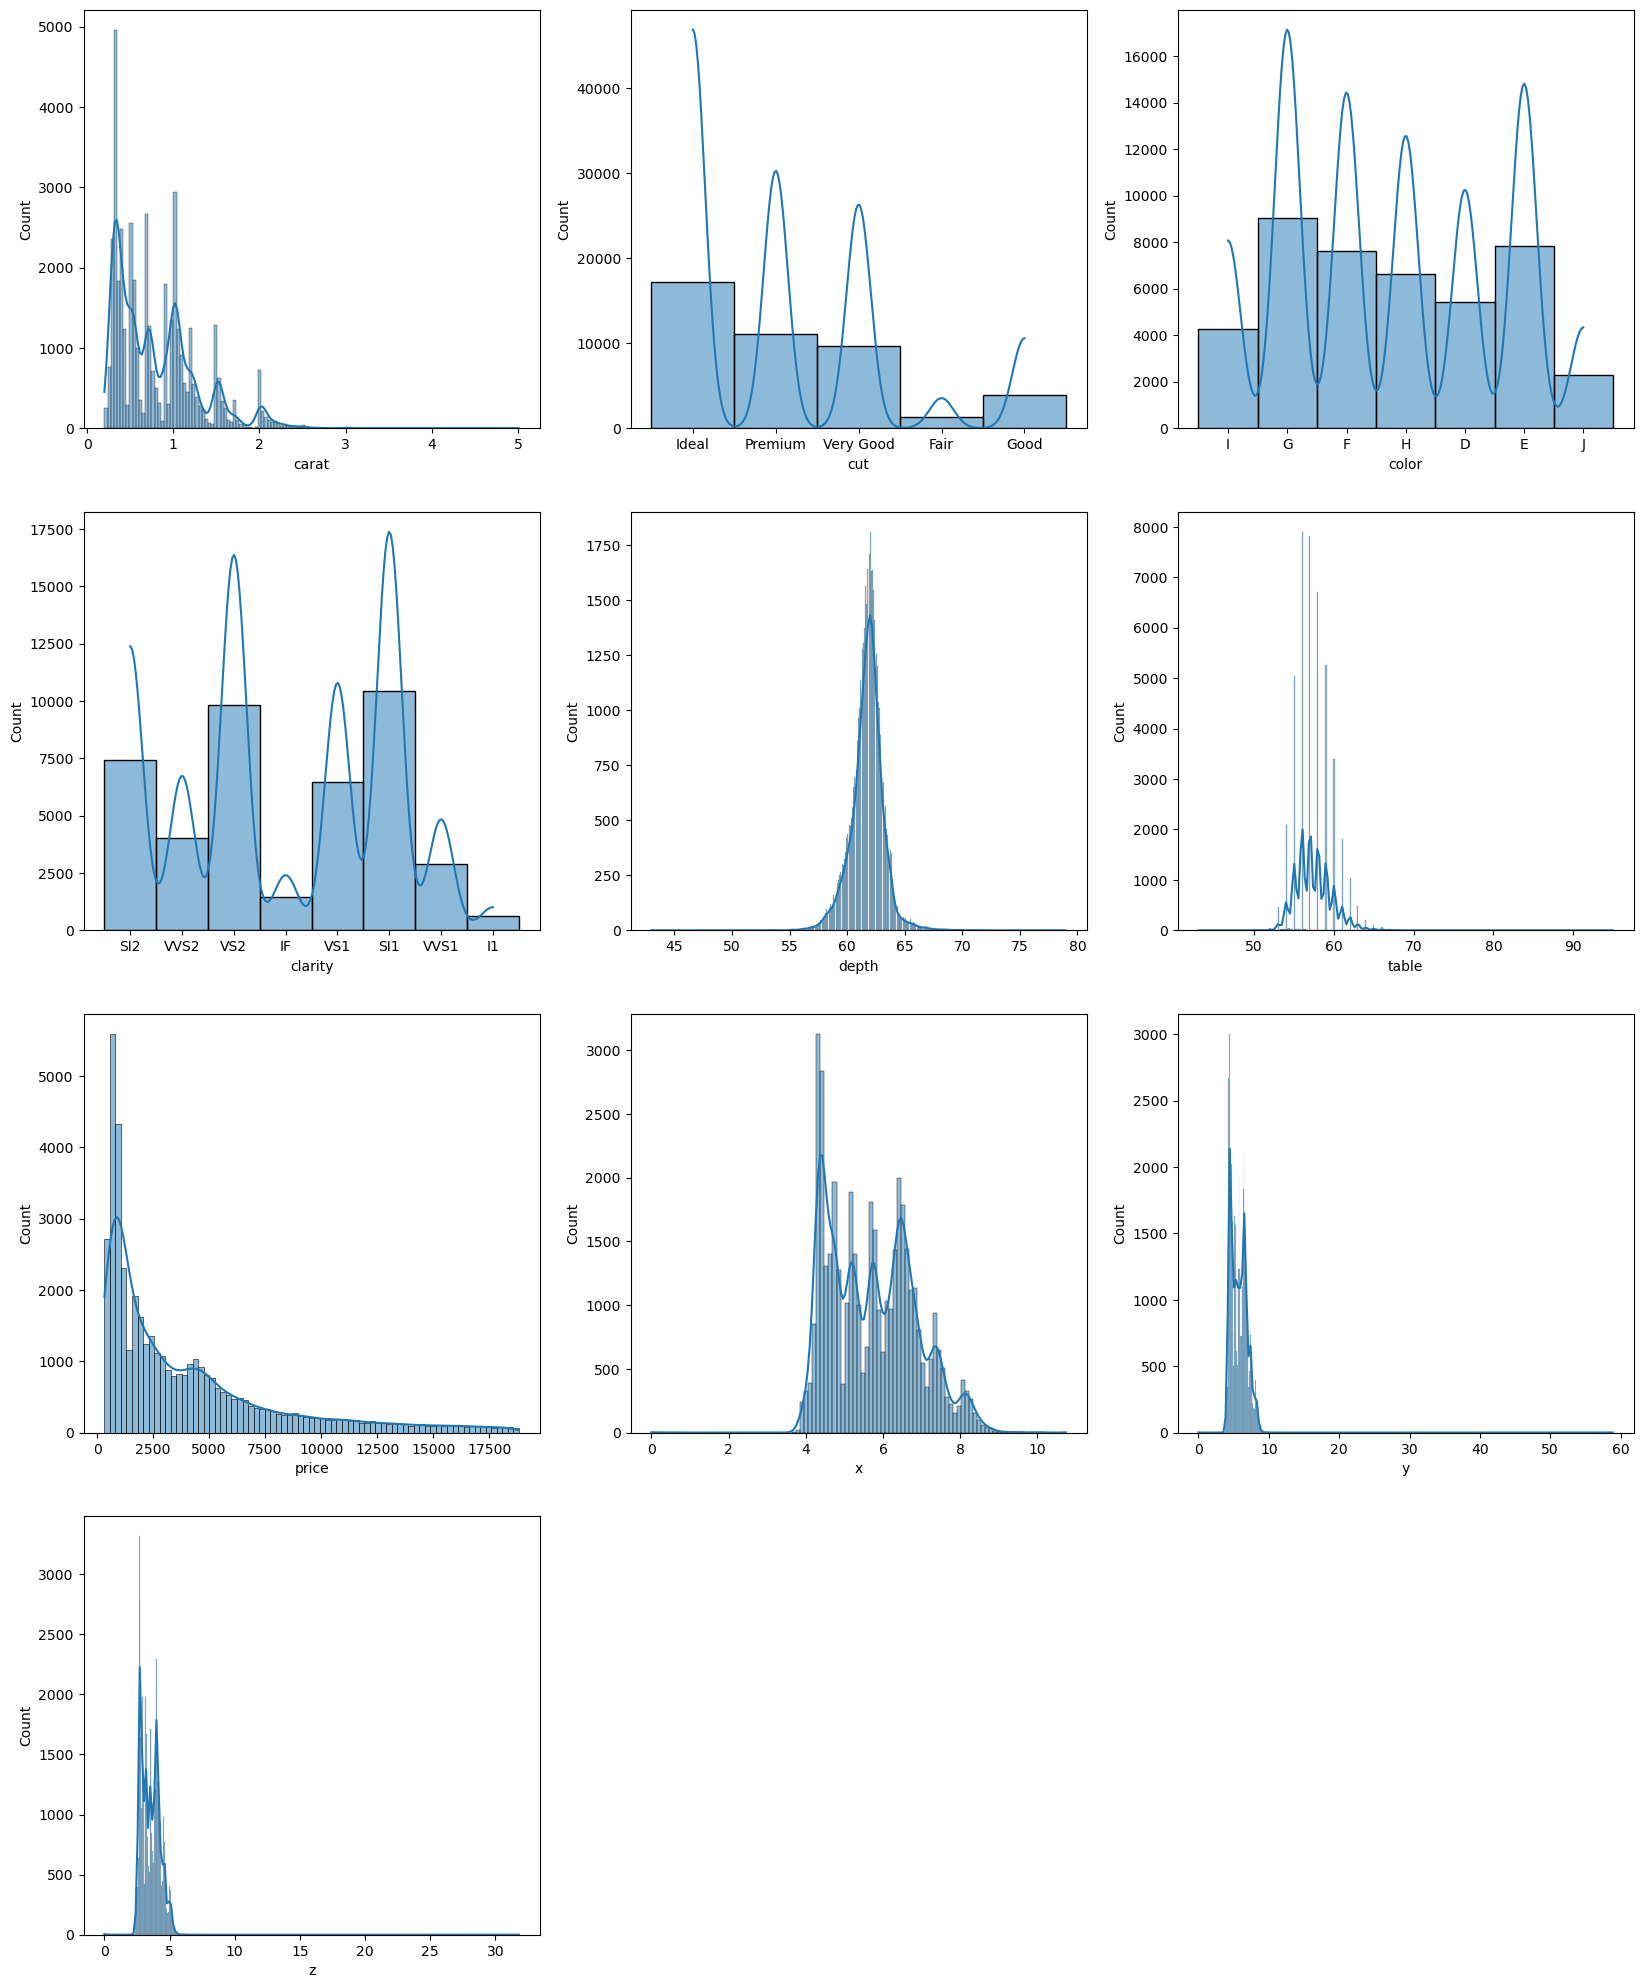

In [124]:
plt.figure(figsize=(20,25))
for index, col in enumerate(data.columns):
        ax = plt.subplot(4, 3, index+1)
        sns.histplot(data[col] , ax=ax , kde=True)
        plt.xlabel(col)
plt.show()

## data preprocessing

In [125]:
# remove uncorrected data 
df=df[(df['x']!=0) & (df['y']!=0) & (df['z']!=0)]

In [126]:
df=data.copy()
df['price']=np.float64(df['price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  float64
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.6+ MB


In [127]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596.0,5.76,5.72,3.50


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  float64
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.6+ MB


In [129]:
# Replace outliers with the median.
def replace_outliear_with_median(df,column,r=5):
    Q1=df[column].quantile(.25)
    Q3=df[column].quantile(.75)
    IQR= Q3-Q1
    
    lower_pound=Q1-r*IQR
    upper_pound=Q3+r*IQR
    
    median_value=df[column].median()
    df[column]=np.where((df[column] < lower_pound) |(df[column] > upper_pound) ,median_value,df[column])

for col in df.select_dtypes('float'):
    replace_outliear_with_median(df,col)

In [130]:
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [131]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797755,61.747314,57.456516,3929.491912,5.731568,5.733180,3.537912
std,0.473160,1.406085,2.222376,3985.527795,1.121279,1.112884,0.695047
min,0.200000,53.800000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,4.130000,70.000000,73.000000,18823.000000,10.740000,10.540000,8.060000


In [132]:
# Create a new feature representing the ratio of carat weight to table width
df['carat_per_table']=df['carat']/df['table']

# Create a new feature representing the ratio of carat weight to depth
df['carat_per_depth']=df['carat']/df['depth']

# Create a new feature representing the product of table width, depth, and carat weight
df['carat_table_depth']=df['table']*df['depth']*df['carat']

# Create a new feature representing the volume of the diamond by calculating the product of its dimensions (length, width, and depth)
df['volume']=df['x']*df['y']*df['z']

# Create a new feature representing the Surface area of the diamond (length, width, and depth)
df['surface_area'] = 2 * ((df['x'] * df['y'] + df['x']* df['z'] + df['y'] * df['z']))

# Create a new feature representing the ratio of the diamond's volume to its depth
df['Volume_depth']=df['volume']/df['depth']

# Create a new feature representing the ratio of the diamond's volume to its carat weight
df['Volume_carat']=df['volume']/df['carat']

In [133]:
#correlation after creating new features with price
df.corr()['price']

carat                0.922010
depth               -0.014160
table                0.128399
price                1.000000
x                    0.885181
y                    0.887111
z                    0.874405
carat_per_table      0.922284
carat_per_depth      0.922979
carat_table_depth    0.914313
volume               0.921766
surface_area         0.909571
Volume_depth         0.921830
Volume_carat        -0.094835
Name: price, dtype: float64

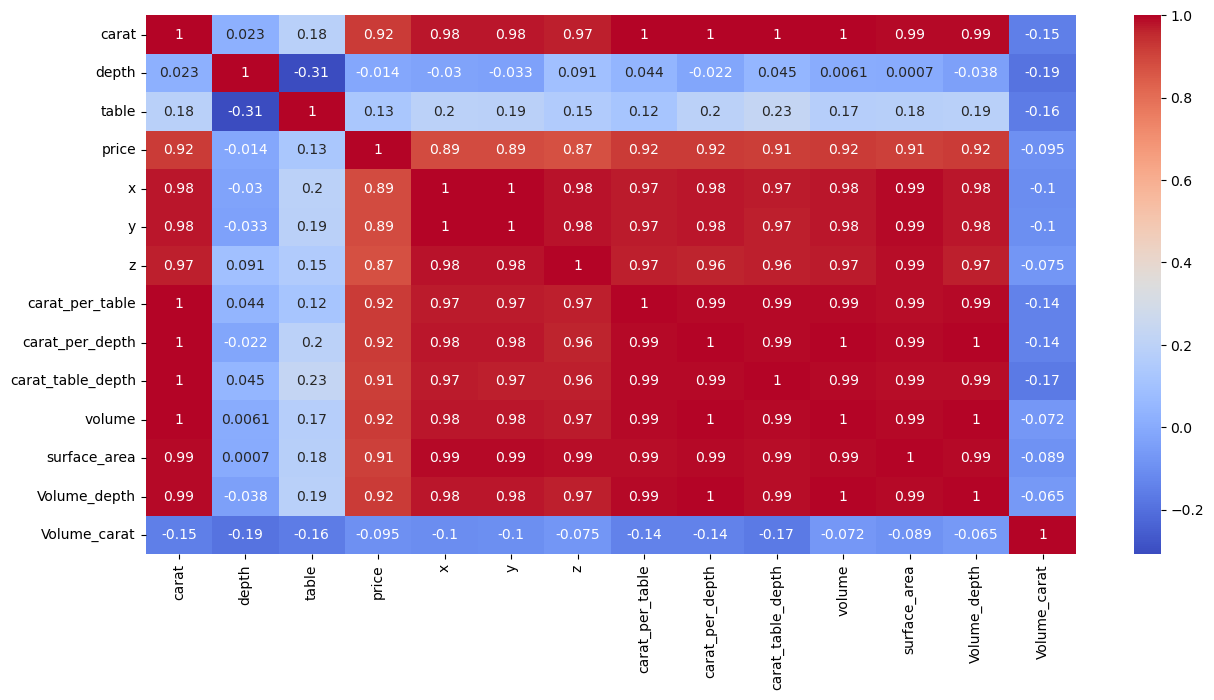

In [134]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

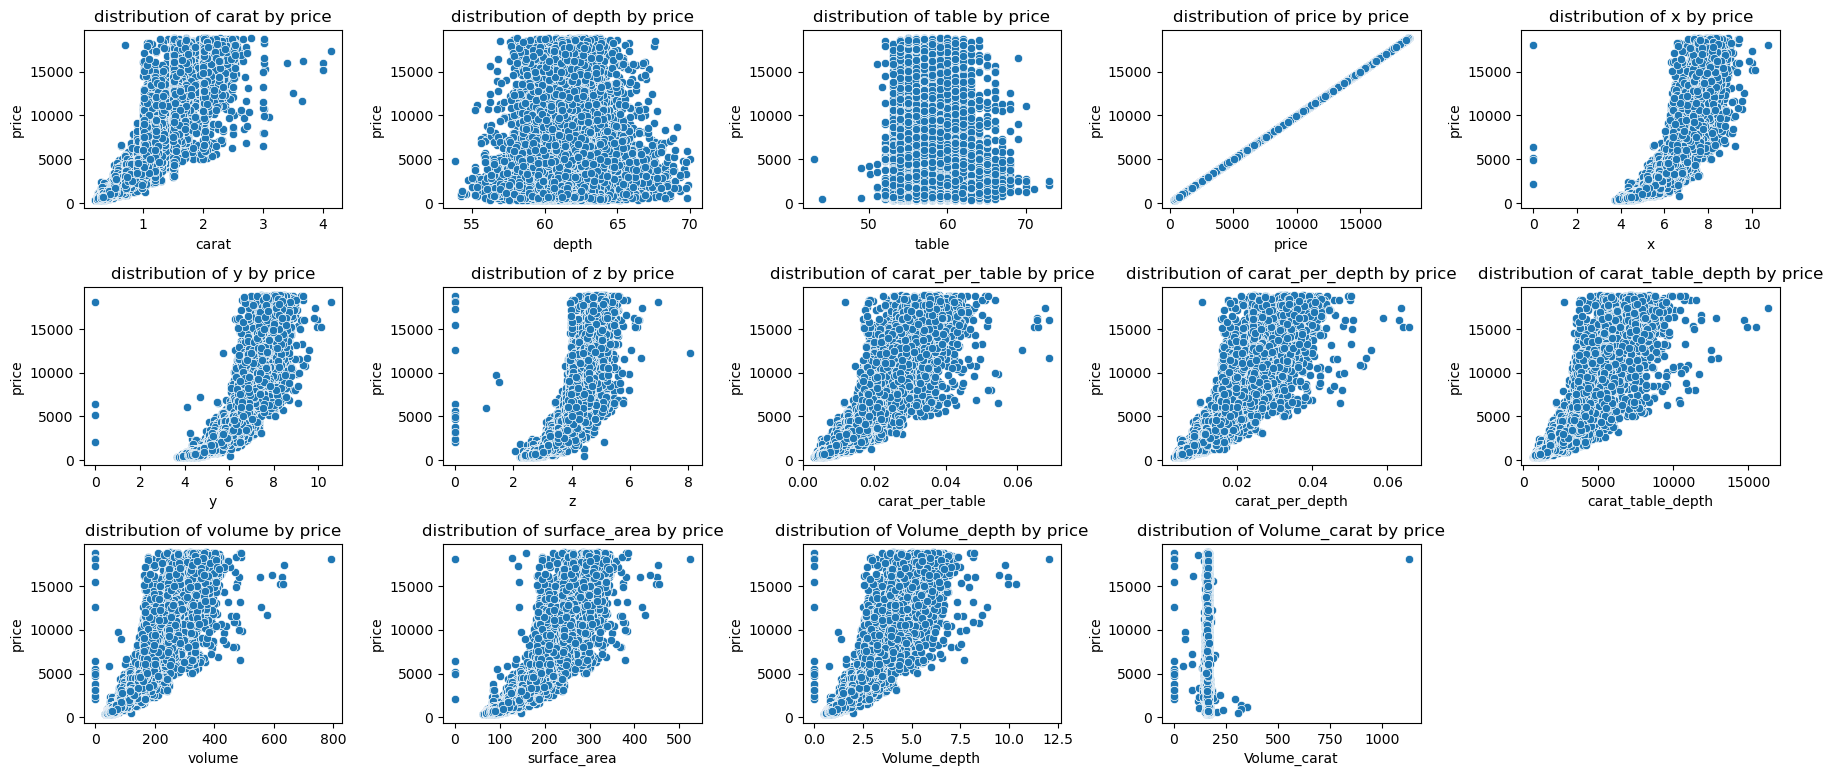

In [135]:
col=df.select_dtypes('float').columns
plt.figure(figsize=(18,10))
for e,i in enumerate(col):
    plt.subplot(4,5,e+1)
    sns.scatterplot(x=df[i],y=df.price)
    plt.title(f'distribution of {i} by price')
    plt.tight_layout()

## split data to train and test

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### preparing the data

In [138]:
# Separate the predictors and the labels
data_label=train_set['price']
df=train_set.drop(['price'],axis=1)

In [139]:
from sklearn.preprocessing import OrdinalEncoder

In [140]:
#grouping features with lowest correlation for polynomial Features
poly_ft=['table','depth','carat']

In [141]:
#grouping 'color','clarity' features for OrdinalEncoder
cat_data=df[['color','clarity','cut']]
cat_attributes=list(cat_data)

In [142]:
#Separate numerical features
num_data=df.drop(['cut','color','clarity','table','depth','carat'],axis=1)
num_diamonds=list(num_data)

In [143]:
OE=OrdinalEncoder()
ord_cat=OE.fit_transform(cat_data)

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

In [145]:
#apply a full_pipline which scale num data, encode categoric data 
preprocessor=ColumnTransformer([("num",StandardScaler(),num_diamonds),
                               ("cat",OrdinalEncoder(),cat_attributes),
                               ('poly',PolynomialFeatures(degree=3,interaction_only=True,include_bias=False),poly_ft)])
data_prepared=preprocessor.fit_transform(df)

## Select and train model

### 1-Linear regression

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [147]:
lin_reg=LinearRegression()
lin_reg.fit(data_prepared,data_label)

LinearRegression()

In [148]:
predict=lin_reg.predict(data_prepared)
np.sqrt(mean_squared_error(data_label,predict))

1292.8537073617517

In [149]:
train_scores=cross_val_score(lin_reg,data_prepared,data_label,cv=10,scoring="neg_mean_squared_error")
score_rmse=np.sqrt(-train_scores)
np.mean(score_rmse)

1304.02302380329

### 2- Random Forest

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
forest_reg=RandomForestRegressor()
forest_reg.fit(data_prepared,data_label)

forest_pred=forest_reg.predict(data_prepared)

forest_mse=mean_squared_error(data_label,forest_pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

211.21868607229308

In [152]:
forest_score=cross_val_score(forest_reg,data_prepared,data_label,cv=10,scoring="neg_mean_squared_error")
forest_score_rmse=np.sqrt(-forest_score)
forest_score_rmse
np.mean(forest_score_rmse)

569.6196896371812

### XGboost

In [153]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

param = {
    'objective': 'reg:squarederror', 'booster': 'gbtree', 'learning_rate': 1,
    'reg_alpha':.01, 'reg_lambda':.1, 'random_state': 1, 'n_jobs': -1 , 'colsample_bytree':1
        }

xgb = XGBRegressor(**param)
xgb.fit(data_prepared,data_label)
diamond_predictions = xgb.predict(data_prepared)
xgb_mse = mean_squared_error(data_label, diamond_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

252.3706658023967

 we found XGB is the best model

## fine-tune the model

In [154]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.02,0.03],
    'max_depth': [6,7,8],
    'n_estimators': [400]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(data_prepared, data_label)

final_model = grid_search.best_estimator_

In [155]:
grid_search.best_params_

{'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 400}

## evaluate the final model on test set

In [156]:
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

X_test_prepared = preprocessor.transform(X_test)
final_predictions =  final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

526.733674400271

In [157]:
url = 'https://drive.google.com/uc?id=1V-Os4IASaJMUNC1C6rYdan3UNlkdIUEL'


df = pd.read_csv(url)
df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [158]:
df['carat_per_table']=df['carat']/df['table']
df['carat_per_depth']=df['carat']/df['depth']
df['carat_table_depth']=df['table']*df['depth']*df['carat']
df['volume']=df['x']*df['y']*df['z']
df['surface_area'] = 2 * ((df['x'] * df['y'] + df['x']* df['z'] + df['y'] * df['z']))
df['Volume_depth']=df['volume']/df['depth']
df['Volume_carat']=df['volume']/df['carat']

In [159]:
Id=df.Id
df.drop(['Id'],axis=1,inplace=True)

In [160]:
test_prepared = preprocessor.transform(df)
price = final_model.predict(test_prepared)

In [161]:
Submissions=pd.DataFrame({'Id':Id,'price':price})
Submissions

,Id,price
0,1,881.141663
1,2,2830.229004
2,3,857.635681
3,4,2729.489502
4,5,1109.487427
...,...,...
10783,10784,1719.738770
10784,10785,6528.787109
10785,10786,4378.692383
10786,10787,4680.188965


In [162]:
from google.colab import files

Submissions.to_csv("submissions.csv", index=False)
files.download("submissions.csv")